# Monte Carlo Methods
-------------------------------------------

### Importance Sampling
A method for estimating the expectation of a function $\phi(x)$. Imagine the target distribution is a one dimensional density $P(x)$ and we can evaluate the density at $x$ and that we have $P(x) = \frac{P^{*}(x)}{Z}$ i.e. we can evaluate the target density to within a multiplicative constant. 

Suppose then we have $Q(x)$ a density frome which we can easily generate samples from - can we use this in some way to generate samples from the original? What issues are there?

1. For all $Q(x) > P(x)$ we will oversample 
2. For all $Q(x) < P(x)$ we will undersample

To solve this we introduce a weight function.
$$w_r = \frac{P^*(x_r)}{Q^*(x_r)}$$

In [1]:
from scipy.stats import uniform, norm
import matplotlib.pyplot as plt
import numpy as np
import math

#### An Example
In the following example we have the function:
$$h(x) = 10 \times e^{-2|x-5|} $$

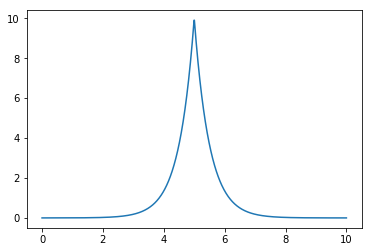

In [2]:
def h(x):
    return 10 * math.exp(-2 * abs(x - 5))

xs = np.linspace(0, 10, 1000)
ys = list(map(h, xs))

plt.plot(xs, ys)

If we want to estimate the mean value we can randomly sample points using a uniform distribution from 0 to 10. The problem we will find is that the function has a peak at five and most of the samples provided by the uniform distribtuion are contributing very little to our estimate. 

In [3]:
xs = uniform.rvs(0, 10, 10000)
ys = list(map(h, xs))
print('Mean', np.mean(ys), 'Variance', np.var(ys))

Mean 1.01043281164 Variance 4.11460427882


Instead a distribtuion more similar to the function $h$ might provide better samples for us to estimate the mean from, something like a Gaussian $ce^{-x^2}$ with a peak at 5 and a small variance - $N(5, 1)$. The probability density function for this normal distribution is 
$$ p(x) = \frac{1}{\sigma \sqrt{2\pi}}e^{\frac{-(x-\mu)^2}{2\sigma^2}} $$

Whereas before to estimate our mean we used the following formula: 
$$ \int_0^{10} \frac{10 \times e^{-2|x-5|} }{10} $$

First we can rewrite the integral as: 
$$ \int_0^{10} 10 \times e^{-2|x-5|} \frac{\frac{1}{10}}{\frac{1}{\sqrt{2\pi}}e^{\frac{-(x-5)^2}{2}}}\frac{1}{ \sqrt{2\pi}}e^{\frac{-(x-5)^2}{2}} $$

Simplifying to: 
$$ \int_0^{10} e^{-2|x-5|} {\sqrt{2\pi}}e^{\frac{(x-5)^2}{2}} \times \frac{1}{\sqrt{2\pi}}e^{\frac{-(x-5)^2}{2}} $$

In [4]:
def w(x):
    return uniform.pdf(x, 0, 10)/norm.pdf(x, 5, 1)

def g(x):
    return h(x) * w(x)

xs1 = norm.rvs(5, 1, 10000)
ys1 = list(map(g, xs))
print('Mean', np.mean(ys1), 'Variance', np.var(ys1))

Mean 2.70871516989 Variance 25.9275648708


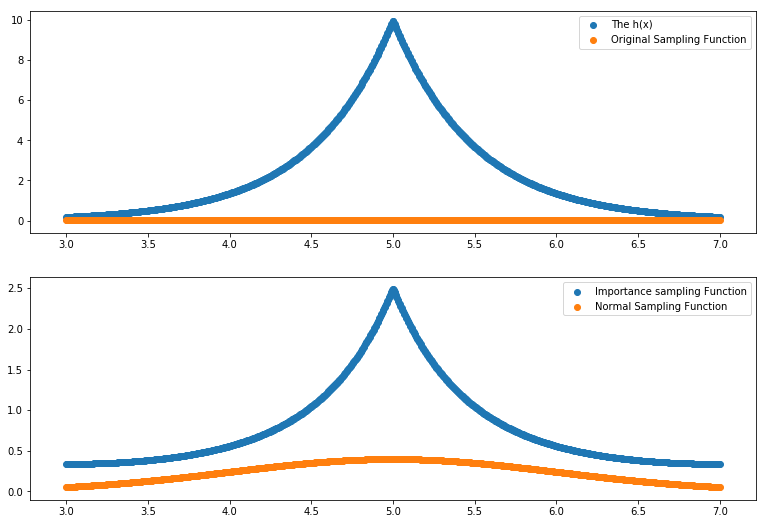

In [5]:
fig, ax = plt.subplots(2, 1, figsize=(13, 9))
axes = ax.ravel()
xs = np.linspace(3, 7, 1000)
ys_h = list(map(h, xs))
ys_h_pdf = norm.pdf(xs, 0, 10)

ys_g = list(map(g, xs))
ys_g_pdf = norm.pdf(xs, 5, 1)

axes[0].scatter(xs, ys_h, label='The h(x)')
axes[0].scatter(xs, ys_h_pdf, label='Original Sampling Function')
axes[1].scatter(xs, ys_g, label='Importance sampling Function')
axes[1].scatter(xs, ys_g_pdf, label='Normal Sampling Function')
axes[0].legend()
axes[1].legend()
plt.show()

## Markov Chain Monte Carlo Simulations 
-------------

In [52]:
import random

def mcmc(iters):
    xs = np.zeros(shape=(iters))
    xs[0] = 0.5
    for i in range(1, iters - 1):
        u = random.random()
        x_c = norm.rvs(xs[i], 1, 1)
        if u < min(1, norm.pdf(x_c)/norm.pdf(xs[i])):
            xs[i + 1] = x_c
        else:
            xs[i + 1] = xs[i]
    return xs
                      
mcxs = mcmc(1000)
mcys = list(map(norm.pdf, mcxs))

0.0 -0.00967575404638


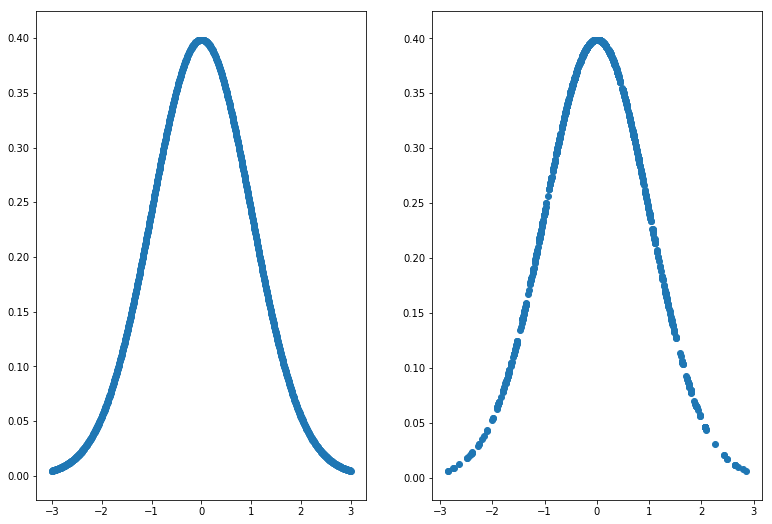

In [55]:

fig, ax = plt.subplots(1, 2, figsize=(13, 9))
axes = ax.ravel()
xs = np.linspace(-3, 3, 1000)
ys = list(map(norm.pdf, xs))

axes[0].scatter(xs, ys)
axes[1].scatter(mcxs, mcys)

print(np.sum(xs * ys), np.mean(mcxs * mcys))

### Modelling a System of Molecules 
-----------------------------------------
As per the paper by Metropolis, Rosenbluth, Rosenbluth, Teller and Teller

In [ ]:
class system:
    def __init__(self, T):
        self.molecules = []
        self.T = T

class molecule:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def setX(self, new_x):
        self.x = new_x
    def setY(self, new_y):
        self.y = new_y
        
